In [307]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

In [308]:
data = np.loadtxt('data_for_LiLi.txt')

In [171]:
# define x, y range
low_v = 8974
high_v = 8994
x = data[:,0]
y1 = data[:,1]
y2 = data[:,2]
label1 = x>low_v
x = x[label1]
y1 = y1[label1]
y2 = y2[label1]
label2 = x<high_v
x = x[label2]
y1 = y1[label2]
y2 = y2[label2]

In [172]:
print(len(x), len(y1), len(y2))

119 119 119


<IPython.core.display.Javascript object>


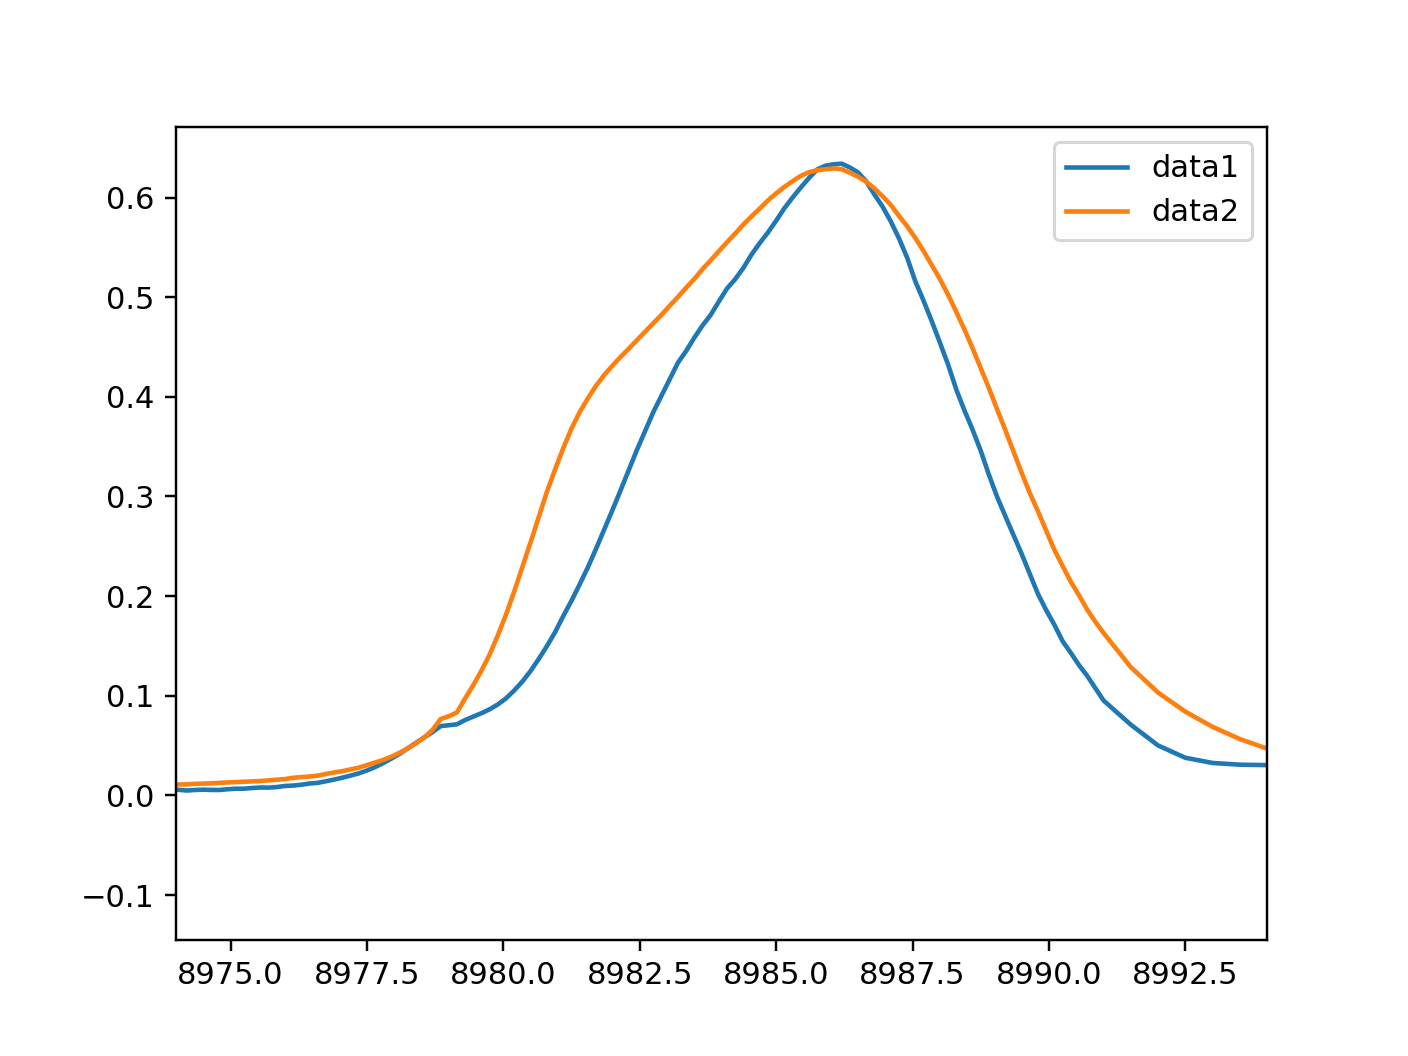

<IPython.core.display.Javascript object>


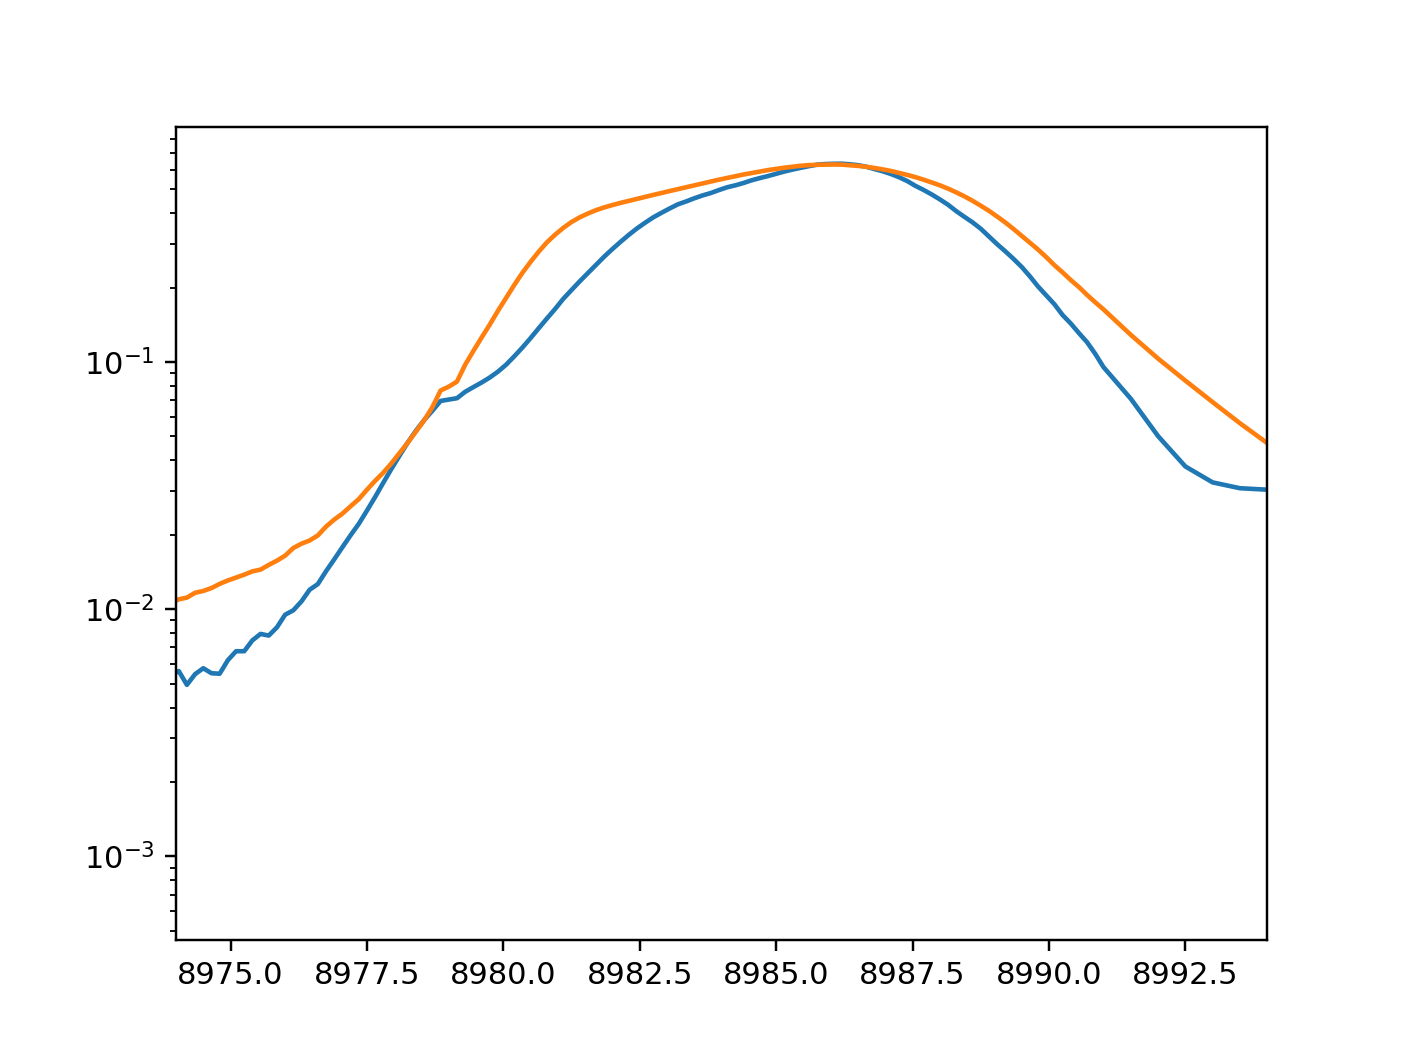

(8974, 8994)

In [174]:
fig, ax = plt.subplots()
#ax.plot(x, y1)
#ax.plot(x, y2)
ax.plot(data[:,0], data[:,1], label='data1')
ax.plot(data[:,0], data[:,2], label='data2')
ax.set_xlim(low_v, high_v)
ax.legend()

fig, ax = plt.subplots()
#ax.plot(x, y1)
#ax.plot(x, y2)
ax.semilogy(data[:,0], data[:,1])
ax.semilogy(data[:,0], data[:,2])
ax.set_xlim(low_v, high_v)

In [224]:
def gaussian(x, area, center, sigma):
    """1 dimensional gaussian
    Parameters
    ----------
    x : array
        independent variable
    area : float
        Area of the normally distributed peak
    center : float
        center position
    sigma : float
        standard deviation
    """
    return ((area / (np.sqrt(2*np.pi) * sigma)) *
            np.exp(-1 * (1.0 * x - center) ** 2 / (2 * sigma ** 2)))

def linear(x, a, b):
    return a*x+b

def get_r2_adjusted(data, y, p=None):
    SSR = np.sum((y-data)**2)
    SST = np.sum((data-np.mean(data))**2)
    if p is None:
        return 1-SSR/SST
    else:
        return 1-SSR/(len(y)-p-1) / (SST/(len(y)-1))
        

In [301]:
gauss_mod1 = Model(gaussian, prefix='g1_')
gauss_mod2 = Model(gaussian, prefix='g2_')
gauss_mod3 = Model(gaussian, prefix='g3_')
linear_model = Model(linear, prefix='l1_')
gauss_mod = gauss_mod1+gauss_mod2+gauss_mod3+linear_model

In [302]:
gauss_mod.param_names
#gauss_mod.independent_vars

{'g1_area',
 'g1_center',
 'g1_sigma',
 'g2_area',
 'g2_center',
 'g2_sigma',
 'g3_area',
 'g3_center',
 'g3_sigma',
 'l1_a',
 'l1_b'}

In [303]:
params = gauss_mod.make_params(g1_center=8978, g1_area=4, g1_sigma=1.0,
                               g2_center=8983, g2_area=4, g2_sigma=1.0,
                               g3_center=8986, g3_area=4, g3_sigma=1.0,
                               l1_a=1, l1_b=0)
#gauss_mod.set_param_hint('g1_center', min=8977, max=9080)

In [304]:
#result1 = gauss_mod.fit(y1, params, x=x, weights=1/np.sqrt(y1))
result1 = gauss_mod.fit(y1, params, x=x)

In [305]:
result1.params
comp1 = result1.eval_components(x=x)

<IPython.core.display.Javascript object>


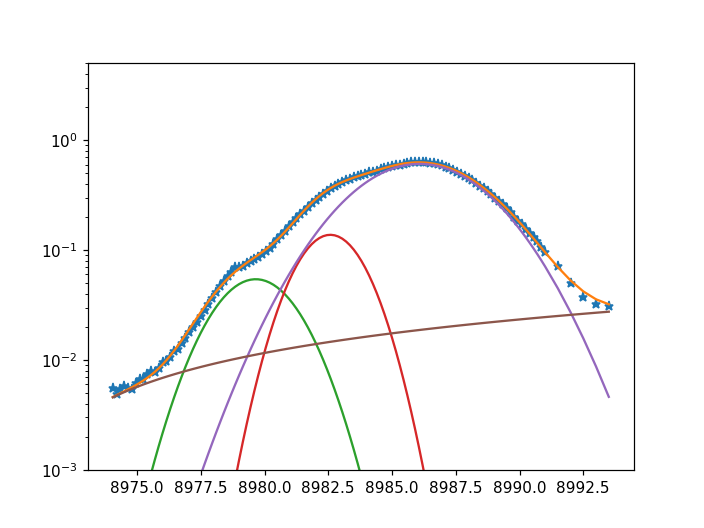

(0.001, 5)

In [306]:
fig, ax = plt.subplots()
ax.semilogy(x, y1, '*')
ax.semilogy(x, result1.best_fit)
ax.semilogy(x, comp1['g1_'])
ax.semilogy(x, comp1['g2_'])
ax.semilogy(x, comp1['g3_'])
ax.semilogy(x, comp1['l1_'])
ax.set_ylim([10**-3, 5])

In [209]:
# fig, ax = plt.subplots()
# ax.semilogy(x, y1, '*')
# ax.semilogy(x, result1.best_fit)
# ax.semilogy(x, comp1['g1_'])
# ax.semilogy(x, comp1['g2_'])
# ax.semilogy(x, comp1['g3_'])
# ax.set_ylim([10**-3, 5])

<IPython.core.display.Javascript object>


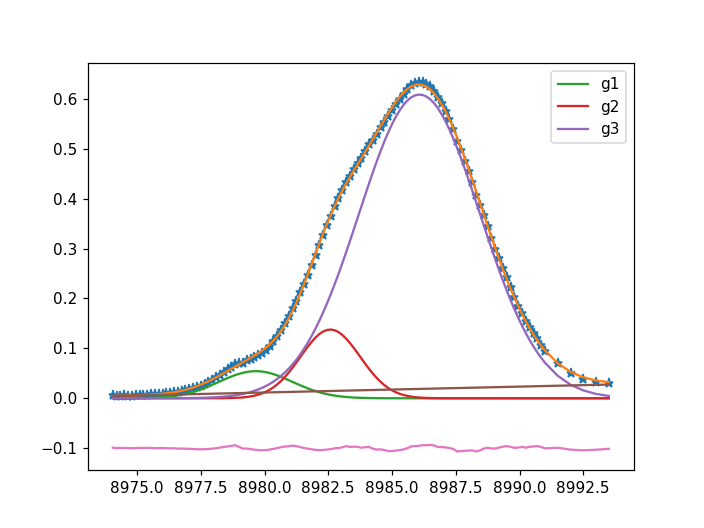

In [286]:
fig, ax = plt.subplots()
ax.plot(x, y1, '*')
ax.plot(x, result1.best_fit)
ax.plot(x, comp1['g1_'], label='g1')
ax.plot(x, comp1['g2_'], label='g2')
ax.plot(x, comp1['g3_'], label='g3')
ax.plot(x, comp1['l1_'])
ax.plot(x, y1-result1.best_fit-0.1)
#ax.set_ylim([10**-3, 1])
plt.legend()

In [230]:
r2_1 = get_r2_adjusted(y1, result1.best_fit, p=11)
print('r2_adjusted: {}'.format(r2_1))

r2_adjusted: 0.9997959381770801


In [211]:
# fig, ax = plt.subplots()
# ax.plot(x, y1, '*')
# ax.plot(x, result1.best_fit)
# ax.plot(x, comp1['g1_'])
# ax.plot(x, comp1['g2_'])
# ax.plot(x, comp1['g3_'])
# #ax.set_ylim([10**-3, 1])

In [287]:
print(result1.fit_report())

[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(linear, prefix='l1_'))
[[Fit Statistics]]
    # function evals   = 259
    # data points      = 119
    # variables        = 11
    chi-square         = 0.001
    reduced chi-square = 0.000
[[Variables]]
    l1_b:       -10.5801237 +/- 0.971644 (9.18%) (init= 0)
    g1_center:   8979.65545 +/- 0.150117 (0.00%) (init= 8978)
    g1_sigma:   -1.43871444 +/- 0.106811 (7.42%) (init= 1)
    g3_center:   8986.07570 +/- 0.016870 (0.00%) (init= 8986)
    g2_sigma:    1.16478152 +/- 0.042337 (3.63%) (init= 1)
    g3_sigma:    2.37639638 +/- 0.015774 (0.66%) (init= 1)
    g3_area:     3.62460152 +/- 0.032631 (0.90%) (init= 4)
    g2_center:   8982.58021 +/- 0.040772 (0.00%) (init= 8983)
    g2_area:     0.40221324 +/- 0.033918 (8.43%) (init= 4)
    l1_a:        0.00117947 +/- 0.000108 (9.18%) (init= 1)
    g1_area:    -0.19594334 +/- 0.021069 (10.75%) (init= 4)
[[Correlations]]

In [281]:
params2 = gauss_mod.make_params(g1_center=8978, g1_area=4, g1_sigma=1.0,
                                g2_center=8983, g2_area=4, g2_sigma=1.0,
                                g3_center=8986, g3_area=4, g3_sigma=1.0,
                                l1_a=1, l1_b=0)
result2 = gauss_mod.fit(y2, params2, x=x)

In [266]:
result2.params
comp2 = result2.eval_components(x=x)

<IPython.core.display.Javascript object>


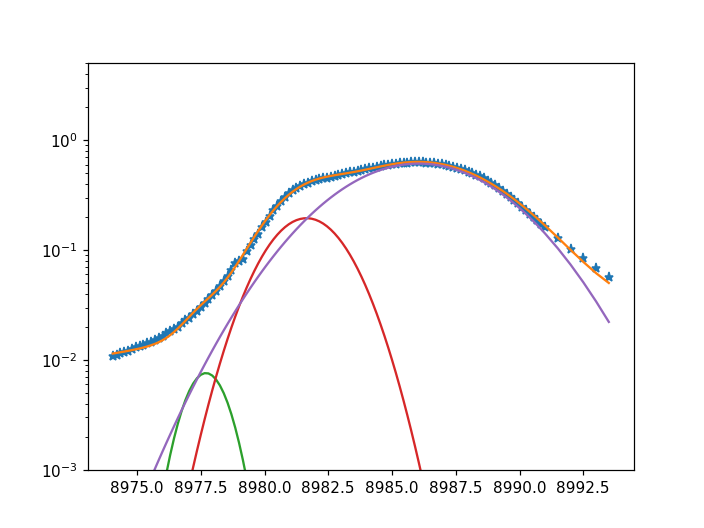

(0.001, 5)

In [267]:
fig, ax = plt.subplots()
ax.semilogy(x, y2, '*')
ax.semilogy(x, result2.best_fit)
ax.semilogy(x, comp2['g1_'])
ax.semilogy(x, comp2['g2_'])
ax.semilogy(x, comp2['g3_'])
ax.set_ylim([10**-3, 5])

<IPython.core.display.Javascript object>


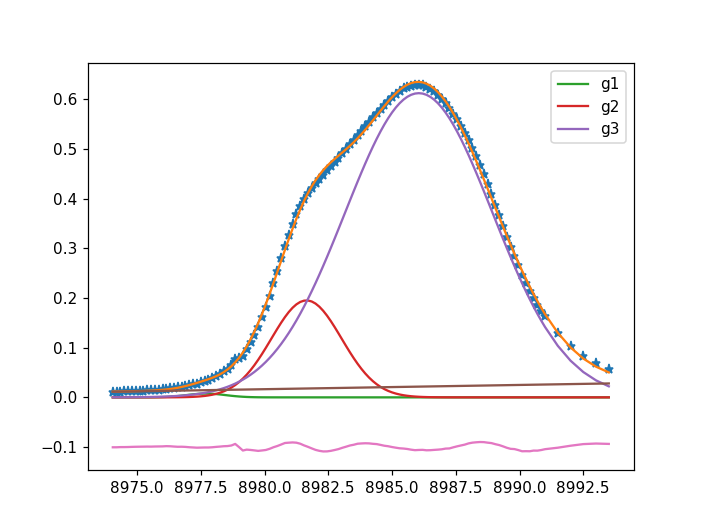

In [242]:
fig, ax = plt.subplots()
ax.plot(x, y2, '*')
ax.plot(x, result2.best_fit)
ax.plot(x, comp2['g1_'], label='g1')
ax.plot(x, comp2['g2_'], label='g2')
ax.plot(x, comp2['g3_'], label='g3')
ax.plot(x, comp2['l1_'])
ax.plot(x, y2-result2.best_fit-0.1)
plt.legend()

In [231]:
r2_2 = get_r2_adjusted(y2, result2.best_fit, p=11)
print('r2_adjusted: {}'.format(r2_2))

r2_adjusted: 0.999449977939828


In [219]:
print(result2.fit_report())

[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(linear, prefix='l1_'))
[[Fit Statistics]]
    # function evals   = 449
    # data points      = 119
    # variables        = 11
    chi-square         = 0.003
    reduced chi-square = 0.000
[[Variables]]
    l1_b:       -7.67869003 +/- 2.150133 (28.00%) (init= 0)
    g1_center:   8977.70454 +/- 0.282297 (0.00%) (init= 8978)
    g1_sigma:   -0.75795986 +/- 0.315536 (41.63%) (init= 1)
    g3_center:   8986.04839 +/- 0.024865 (0.00%) (init= 8986)
    g2_sigma:    1.37618896 +/- 0.031496 (2.29%) (init= 1)
    g3_sigma:    2.89335593 +/- 0.031676 (1.09%) (init= 1)
    g3_area:     4.44078461 +/- 0.065455 (1.47%) (init= 4)
    g2_center:   8981.64602 +/- 0.023517 (0.00%) (init= 8983)
    g2_area:     0.67315400 +/- 0.034969 (5.19%) (init= 4)
    l1_a:        0.00085692 +/- 0.000239 (27.95%) (init= 1)
    g1_area:    -0.01446039 +/- 0.006623 (45.80%) (init= 4)
[[Correlation